# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

In [11]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [12]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


### Analysis of Facebook Wiki

In [13]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [14]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [15]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [16]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

In [17]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [18]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


### Analysis of Fitocracy

In [19]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [20]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [21]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

In [22]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

In [23]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

### Analysis of Reddit

In [24]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [25]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [26]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [27]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

In [28]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

In [29]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
reddit_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M                              1045003
           M                     80705
           W                     22883
W                               275287
           M                     21825
           W                      7809
Name: responder_gender, dtype: int64

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [30]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


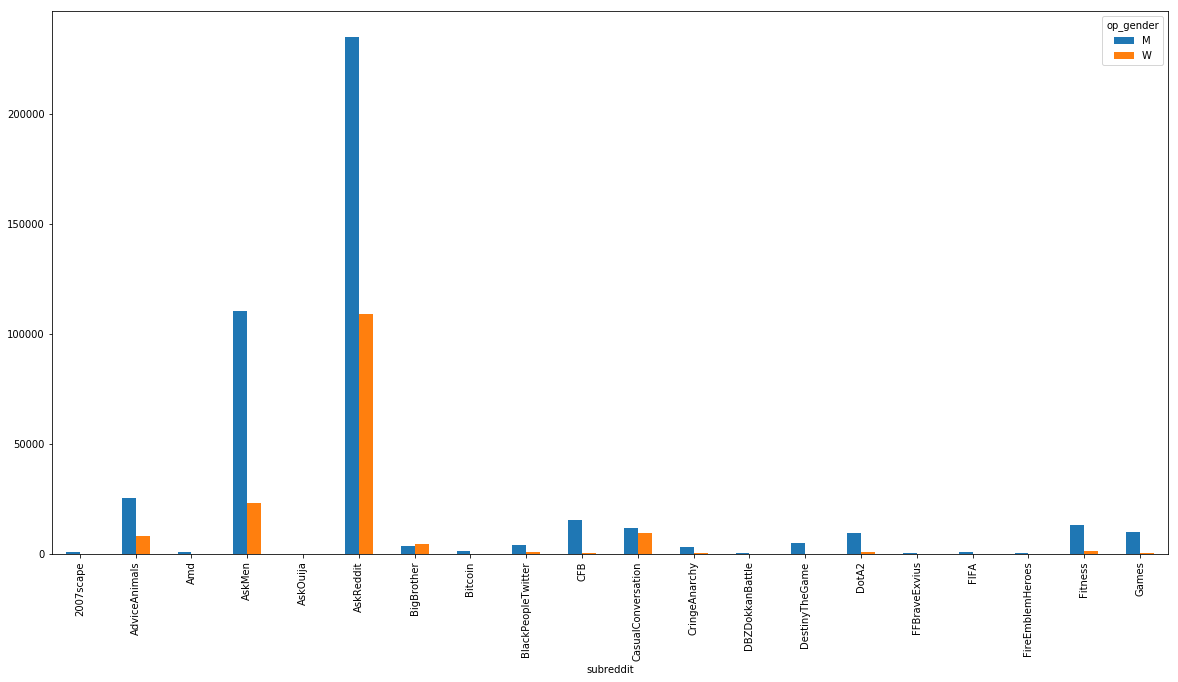

In [31]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [32]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

### Analysis of TED

In [33]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [34]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [35]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [36]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [37]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# should I do a stratified sample?
fb_congress_sample = fb_congress_df.sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
532,19,video,57265377,Roger Williams,Congress_Republican,M,Chris,"Since its inception, Obamacare has been an abs...",Repeal first day. We have insurance and it abs...
658,19,video,57265377,Roger Williams,Congress_Republican,M,Jonathon,"Since its inception, Obamacare has been an abs...","30,000 people in your district have health cov..."
952,26,video,57265377,Roger Williams,Congress_Republican,M,Peggy,In 15 days we will restore conservative values...,So ready. And so ready for the nastiness to s...
1817,53,photo,57265377,Roger Williams,Congress_Republican,M,Mike,BREAKING - The FBI announced today that it wil...,Good Question..'
2023,57,link,57265377,Roger Williams,Congress_Republican,M,Donna,Barack Obama will be out of office in a few sh...,Well there goes another few thousand who will ...


In [38]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      17075
photo     14666
status     9651
video      8516
event        79
note          8
music         5
Name: post_type, dtype: int64
Congress_Republican     31694
Congress_Democratic     17110
Congress_Independent      653
                          543
Name: op_category, dtype: int64
M    37453
W    12547
Name: op_gender, dtype: int64


In [39]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [40]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
532,19,video,57265377,Roger Williams,Congress_Republican,M,Chris,"Since its inception, Obamacare has been an abs...",Repeal first day. We have insurance and it abs...,"[Since, its, inception, ,, Obamacare, has, bee...","[Repeal, first, day, ., We, have, insurance, a...",28,84
658,19,video,57265377,Roger Williams,Congress_Republican,M,Jonathon,"Since its inception, Obamacare has been an abs...","30,000 people in your district have health cov...","[Since, its, inception, ,, Obamacare, has, bee...","[30,000, people, in, your, district, have, hea...",28,35
952,26,video,57265377,Roger Williams,Congress_Republican,M,Peggy,In 15 days we will restore conservative values...,So ready. And so ready for the nastiness to s...,"[In, 15, days, we, will, restore, conservative...","[So, ready, ., And, so, ready, for, the, nasti...",17,15
1817,53,photo,57265377,Roger Williams,Congress_Republican,M,Mike,BREAKING - The FBI announced today that it wil...,Good Question..',"[BREAKING, -, The, FBI, announced, today, that...","[Good, Question.., ']",65,3
2023,57,link,57265377,Roger Williams,Congress_Republican,M,Donna,Barack Obama will be out of office in a few sh...,Well there goes another few thousand who will ...,"[Barack, Obama, will, be, out, of, office, in,...","[Well, there, goes, another, few, thousand, wh...",39,16


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.79769310869623
average post length when poster is female: 77.99091416274807


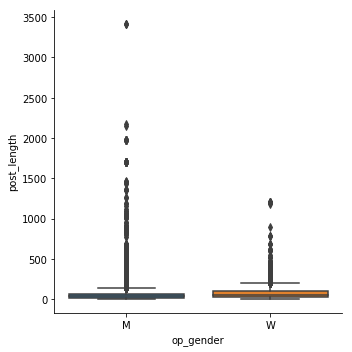

In [41]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Let's look at some more details:

In [42]:
fb_congress_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                        \
                count       mean         std  min   25%   50%   75%     max   
op_gender                                                                     
M             37453.0  58.797693  100.903293  0.0  19.0  35.0  67.0  3419.0   
W             12547.0  77.990914   81.594141  0.0  28.0  53.0  96.0  1205.0   

          response_length                                                      
                    count       mean        std  min  25%   50%   75%     max  
op_gender                                                                      
M                 37453.0  31.415321  64.065252  0.0  7.0  16.0  34.0  2247.0  
W                 12547.0  30.357854  58.253400  0.0  7.0  15.0  33.0  1414.0

average response length when poster is male: 31.41532053507062
average response length when poster is female: 30.357854467203314


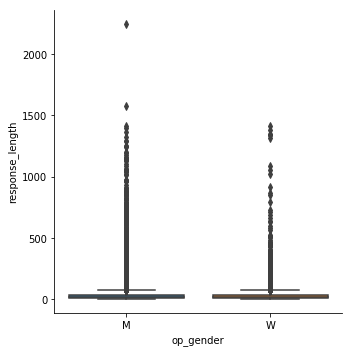

In [43]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses.

In [44]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

In [46]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
532,19,video,57265377,Roger Williams,Congress_Republican,M,Chris,"Since its inception, Obamacare has been an abs...",Repeal first day. We have insurance and it abs...,"[Since, its, inception, ,, Obamacare, has, bee...","[Repeal, first, day, ., We, have, insurance, a...",28,84,9.333333,14.0
658,19,video,57265377,Roger Williams,Congress_Republican,M,Jonathon,"Since its inception, Obamacare has been an abs...","30,000 people in your district have health cov...","[Since, its, inception, ,, Obamacare, has, bee...","[30,000, people, in, your, district, have, hea...",28,35,9.333333,17.5
952,26,video,57265377,Roger Williams,Congress_Republican,M,Peggy,In 15 days we will restore conservative values...,So ready. And so ready for the nastiness to s...,"[In, 15, days, we, will, restore, conservative...","[So, ready, ., And, so, ready, for, the, nasti...",17,15,8.500000,7.5
1817,53,photo,57265377,Roger Williams,Congress_Republican,M,Mike,BREAKING - The FBI announced today that it wil...,Good Question..',"[BREAKING, -, The, FBI, announced, today, that...","[Good, Question.., ']",65,3,21.666667,3.0
2023,57,link,57265377,Roger Williams,Congress_Republican,M,Donna,Barack Obama will be out of office in a few sh...,Well there goes another few thousand who will ...,"[Barack, Obama, will, be, out, of, office, in,...","[Well, there, goes, another, few, thousand, wh...",39,16,19.500000,8.0


In [47]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                              \
                  count       mean       std  min        25%    50%   
op_gender                                                             
M               35429.0  17.875173  8.789828  1.0  11.666667  16.75   
W               12213.0  19.397928  8.127325  1.0  13.533333  18.50   

                            response_avg_slen                             \
                 75%    max             count       mean        std  min   
op_gender                                                                  
M          22.818182  164.5           37032.0  11.765216  13.156840  1.0   
W          24.333333   88.0           12389.0  11.794929  12.673847  1.0   

                                             
                25%       50%   75%     max  
op_gender                                    
M          5.000000  9.500000  15.0  1142.0  
W          5.333333  9.333333  15.0   714.0

It seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Should we add a TTR column?

In [48]:
# define TTR
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    if len(lower) == 0:   # sometimes there was no text
        return None
    else:
        return len(set(lower))/len(lower)

In [49]:
# add to df
#fb_congress_sample['post_TTR'] = fb_congress_sample.post_tokens.map(get_ttr)
#fb_congress_sample['response_TTR'] = fb_congress_sample.response_tokens.map(get_ttr)
#fb_congress_sample.head()

Commented the above out because: is TTR even useful here? Sometimes the responses are so short that they have a TTR of 1. This doesn't help us.

It doesn't seem to make sense to calculate TTR at all since online posts are pretty short to begin with. TTR isn't very meaningful when there aren't very many words to even look at.

How about average google k-band?

In [50]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [51]:
# thanks Na-Rae for this code!

import math

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 20000:  # limiting to 20k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [52]:
# applying to df
fb_congress_sample['post_avg_kband'] = fb_congress_sample.post_tokens.map(get_avg_google_kband)
fb_congress_sample['response_avg_kband'] = fb_congress_sample.response_tokens.map(get_avg_google_kband)

fb_congress_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
532,19,video,57265377,Roger Williams,Congress_Republican,M,Chris,"Since its inception, Obamacare has been an abs...",Repeal first day. We have insurance and it abs...,"[Since, its, inception, ,, Obamacare, has, bee...","[Repeal, first, day, ., We, have, insurance, a...",28,84,9.333333,14.0,3.227273,2.788732
658,19,video,57265377,Roger Williams,Congress_Republican,M,Jonathon,"Since its inception, Obamacare has been an abs...","30,000 people in your district have health cov...","[Since, its, inception, ,, Obamacare, has, bee...","[30,000, people, in, your, district, have, hea...",28,35,9.333333,17.5,3.227273,3.962963
952,26,video,57265377,Roger Williams,Congress_Republican,M,Peggy,In 15 days we will restore conservative values...,So ready. And so ready for the nastiness to s...,"[In, 15, days, we, will, restore, conservative...","[So, ready, ., And, so, ready, for, the, nasti...",17,15,8.500000,7.5,1.785714,1.454545
1817,53,photo,57265377,Roger Williams,Congress_Republican,M,Mike,BREAKING - The FBI announced today that it wil...,Good Question..',"[BREAKING, -, The, FBI, announced, today, that...","[Good, Question.., ']",65,3,21.666667,3.0,2.211538,1.000000
2023,57,link,57265377,Roger Williams,Congress_Republican,M,Donna,Barack Obama will be out of office in a few sh...,Well there goes another few thousand who will ...,"[Barack, Obama, will, be, out, of, office, in,...","[Well, there, goes, another, few, thousand, wh...",39,16,19.500000,8.0,2.030303,2.642857


In [53]:
fb_congress_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                35355.0  2.424387  0.816798  1.0  1.913043  2.314286   
W                12176.0  2.379107  0.724287  1.0  1.937500  2.285714   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.750000  18.0            36237.0  2.763100  2.223511  1.0   
W          2.710836  18.0            12137.0  2.768778  2.187732  1.0   

                                          
                25%       50%  75%   max  
op_gender                                 
M          1.647059  2.200000  3.0  20.0  
W          1.666667  2.219048  3.0  20.0

What does this tell us? Not much - the average k-band is about the same for male vs. female posters and in responses to male vs. female posters.

### Facebook Wiki linguistic analysis

In [54]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [55]:
# still too large for my analysis, let's reduce to 50,000 again
fb_wiki_sample = fb_wiki_df.sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [56]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
29,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Joyce,Temps warming up for the holiday weekend! I wi...,Hoping your vacation time is exactly what you ...,"[Temps, warming, up, for, the, holiday, weeken...","[Hoping, your, vacation, time, is, exactly, wh...",20,25
82,8,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Vonnie,Who forgot to pay the heat bill? Current wind ...,Enjoy your weekend,"[Who, forgot, to, pay, the, heat, bill, ?, Cur...","[Enjoy, your, weekend]",56,3
288,32,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,"Chilly now, but temps start warm next week. Ra...",Thanks Byron,"[Chilly, now, ,, but, temps, start, warm, next...","[Thanks, Byron]",34,2
305,35,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sambala,T'storms to the south and heading this way. Te...,Noooooooooo,"[T'storms, to, the, south, and, heading, this,...",[Noooooooooo],40,1
318,37,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Protect your plants away from the lake tonight...,Thanks Byron,"[Protect, your, plants, away, from, the, lake,...","[Thanks, Byron]",40,2


average post length when poster is male: 38.324696502989674
average post length when poster is female: 28.483957778907396


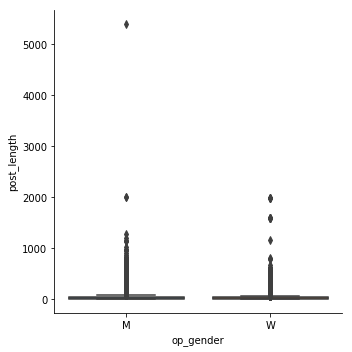

In [57]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results.

average response length when poster is male: 14.591049103098387
average response length when poster is female: 13.388451992943217


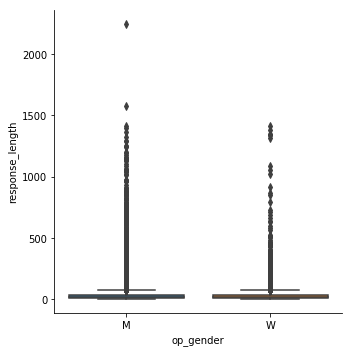

In [58]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters.

In [59]:
# summary of post and response length
fb_wiki_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             16557.0  38.324697  87.297411  0.0  6.0  17.0  34.0  5396.0   
W             33443.0  28.483958  50.525299  0.0  8.0  20.0  32.0  1978.0   

          response_length                                                     
                    count       mean        std  min  25%  50%   75%     max  
op_gender                                                                     
M                 16557.0  14.591049  35.092452  0.0  3.0  7.0  15.0  1378.0  
W                 33443.0  13.388452  30.618257  0.0  3.0  6.0  13.0  1402.0

In [60]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [61]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

In [62]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
29,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Joyce,Temps warming up for the holiday weekend! I wi...,Hoping your vacation time is exactly what you ...,"[Temps, warming, up, for, the, holiday, weeken...","[Hoping, your, vacation, time, is, exactly, wh...",20,25,6.666667,8.333333
82,8,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Vonnie,Who forgot to pay the heat bill? Current wind ...,Enjoy your weekend,"[Who, forgot, to, pay, the, heat, bill, ?, Cur...","[Enjoy, your, weekend]",56,3,9.333333,3.000000
288,32,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,"Chilly now, but temps start warm next week. Ra...",Thanks Byron,"[Chilly, now, ,, but, temps, start, warm, next...","[Thanks, Byron]",34,2,8.500000,2.000000
305,35,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sambala,T'storms to the south and heading this way. Te...,Noooooooooo,"[T'storms, to, the, south, and, heading, this,...",[Noooooooooo],40,1,8.000000,1.000000
318,37,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Protect your plants away from the lake tonight...,Thanks Byron,"[Protect, your, plants, away, from, the, lake,...","[Thanks, Byron]",40,2,6.666667,2.000000


In [63]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                      \
                  count       mean       std  min  25%       50%        75%   
op_gender                                                                     
M               14902.0  11.581357  8.783572  1.0  6.0  9.333333  15.200000   
W               29625.0  11.012044  9.570741  1.0  7.0  9.750000  13.666667   

                 response_avg_slen                                          \
             max             count      mean       std  min  25%  50%  75%   
op_gender                                                                    
M          288.0           16511.0  7.451392  8.820379  1.0  3.0  5.0  9.5   
W          527.0           33349.0  7.229999  9.578203  1.0  2.5  5.0  9.0   

                  
             max  
op_gender         
M          344.0  
W          472.0

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters.

In [64]:
# average google k-band
# applying to df
fb_wiki_sample['post_avg_kband'] = fb_wiki_sample.post_tokens.map(get_avg_google_kband)
fb_wiki_sample['response_avg_kband'] = fb_wiki_sample.response_tokens.map(get_avg_google_kband)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
29,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Joyce,Temps warming up for the holiday weekend! I wi...,Hoping your vacation time is exactly what you ...,"[Temps, warming, up, for, the, holiday, weeken...","[Hoping, your, vacation, time, is, exactly, wh...",20,25,6.666667,8.333333,2.705882,1.727273
82,8,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Vonnie,Who forgot to pay the heat bill? Current wind ...,Enjoy your weekend,"[Who, forgot, to, pay, the, heat, bill, ?, Cur...","[Enjoy, your, weekend]",56,3,9.333333,3.000000,2.409091,2.000000
288,32,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,"Chilly now, but temps start warm next week. Ra...",Thanks Byron,"[Chilly, now, ,, but, temps, start, warm, next...","[Thanks, Byron]",34,2,8.500000,2.000000,2.346154,6.000000
305,35,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Sambala,T'storms to the south and heading this way. Te...,Noooooooooo,"[T'storms, to, the, south, and, heading, this,...",[Noooooooooo],40,1,8.000000,1.000000,2.333333,NaN
318,37,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Protect your plants away from the lake tonight...,Thanks Byron,"[Protect, your, plants, away, from, the, lake,...","[Thanks, Byron]",40,2,6.666667,2.000000,2.862069,6.000000


In [65]:
fb_wiki_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                     \
                   count      mean       std  min   25%       50%       75%   
op_gender                                                                     
M                14616.0  2.794716  1.828902  1.0  1.80  2.394737  3.154472   
W                29073.0  2.620842  1.472798  1.0  1.75  2.315789  3.062500   

                response_avg_kband                                     \
            max              count      mean       std  min       25%   
op_gender                                                               
M          19.5            15029.0  3.550640  3.359624  1.0  1.555556   
W          20.0            30364.0  3.887512  3.855448  1.0  1.562500   

                                     
                50%       75%   max  
op_gender                            
M          2.346939  4.000000  20.0  
W          2.400000  4.333333  20.0

What does this tell us? Again - not much. The average k-band is about the same for all.

### Fitocracy linguistic analysis

In [66]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [67]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."
10,10,117,M,26833,M,This whole bulkin' thing is fun I guess but th...,"One of us, one of us . . ."
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?


So now we have both op gender and responder gender. I want to figure out how to put all of this in a box plot together for easier visualization... look into this. For now, moving on.

In [68]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...","[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26
10,10,117,M,26833,M,This whole bulkin' thing is fun I guess but th...,"One of us, one of us . . .","[This, whole, bulkin, ', thing, is, fun, I, gu...","[One, of, us, ,, one, of, us, ., ., .]",60,10
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings,"[And, now, after, a, very, fucking, annoying, ...","[You, are, the, wind, beneath, my, wings]",52,7
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?,"[I, need, to, recruit, the, refrigerator, gnom...","[What, exactly, is, a, refrigerator, gnome, ?]",26,7


In [69]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                     \
                count       mean        std  min  25%   50%   75%    max   
op_gender                                                                  
M             27141.0  17.051693  17.767980  1.0  7.0  10.0  20.0  626.0   
W             22859.0  18.529988  19.112293  1.0  8.0  11.0  22.0  442.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27141.0  24.685936  28.934170  1.0  6.0  12.0  29.0  255.0  
W                 22859.0  27.724047  31.110577  1.0  6.0  13.0  35.0  407.0

In [70]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12388.0  16.594608  18.717718  1.0  5.0  10.0   
          W                 14753.0  31.480174  33.836156  1.0  6.0  14.0   
W         M                 12041.0  15.783905  17.655907  1.0  5.0  10.0   
          W                 10818.0  41.014051  36.918010  1.0  8.0  22.0   

                             75%    max  
op_gender responder_gender               
M         M                 21.0  247.0  
          W                 58.0  255.0  
W         M                 19.0  283.0  
          W                 86.0  407.0

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters, but female responders have longer responses when responding to female than when responding to male.

In [71]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [72]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [73]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...","[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667
10,10,117,M,26833,M,This whole bulkin' thing is fun I guess but th...,"One of us, one of us . . .","[This, whole, bulkin, ', thing, is, fun, I, gu...","[One, of, us, ,, one, of, us, ., ., .]",60,10,15.0,3.333333
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings,"[And, now, after, a, very, fucking, annoying, ...","[You, are, the, wind, beneath, my, wings]",52,7,26.0,7.000000
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?,"[I, need, to, recruit, the, refrigerator, gnom...","[What, exactly, is, a, refrigerator, gnome, ?]",26,7,26.0,7.000000


In [74]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                     \
                  count      mean       std  min       25%  50%        75%   
op_gender                                                                    
M               27141.0  9.276294  6.465424  1.0  5.333333  8.0  10.750000   
W               22859.0  9.266358  6.045910  1.0  5.500000  8.0  10.333333   

                 response_avg_slen                                           \
             max             count       mean       std  min  25%       50%   
op_gender                                                                     
M          117.5           27141.0  10.063865  8.681820  1.0  4.0  7.000000   
W          105.0           22859.0  10.607382  9.478585  1.0  4.0  7.333333   

                             
                 75%    max  
op_gender                    
M          12.250000  124.0  
W          12.666667  203.5

In [75]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12388.0   8.384556   6.591331  1.0  4.0   
          W                 14753.0  11.473970   9.891011  1.0  4.0   
W         M                 12041.0   7.911098   6.320669  1.0  4.0   
          W                 10818.0  13.608487  11.326321  1.0  5.0   

                                  50%   75%    max  
op_gender responder_gender                          
M         M                  6.666667  11.0  124.0  
          W                  7.500000  15.0   84.0  
W         M                  6.000000  10.0  114.0  
          W                 10.000000  25.0  203.5

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

In [76]:
# computing average k-band
fitocracy_sample['post_avg_kband'] = fitocracy_sample.post_tokens.map(get_avg_google_kband)
fitocracy_sample['response_avg_kband'] = fitocracy_sample.response_tokens.map(get_avg_google_kband)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000,2.181818,1.976190
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...","[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667,1.600000,1.200000
10,10,117,M,26833,M,This whole bulkin' thing is fun I guess but th...,"One of us, one of us . . .","[This, whole, bulkin, ', thing, is, fun, I, gu...","[One, of, us, ,, one, of, us, ., ., .]",60,10,15.0,3.333333,1.916667,1.000000
21,21,117,M,25712,M,And now after a very fucking annoying week and...,You are the wind beneath my wings,"[And, now, after, a, very, fucking, annoying, ...","[You, are, the, wind, beneath, my, wings]",52,7,26.0,7.000000,2.302326,2.714286
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?,"[I, need, to, recruit, the, refrigerator, gnom...","[What, exactly, is, a, refrigerator, gnome, ?]",26,7,26.0,7.000000,3.565217,3.666667


In [77]:
fitocracy_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                      \
                   count      mean       std  min  25%       50%   75%   max   
op_gender                                                                      
M                26895.0  2.407827  1.449010  1.0  1.4  2.083333  3.05  20.0   
W                22714.0  2.289604  1.262924  1.0  1.4  2.000000  3.00  20.0   

          response_avg_kband                                               \
                       count      mean       std  min       25%       50%   
op_gender                                                                   
M                    26284.0  2.346174  1.955917  1.0  1.333333  1.739130   
W                    22155.0  2.275828  1.915728  1.0  1.333333  1.724138   

                           
                75%   max  
op_gender                  
M          2.571429  20.0  
W          2.416667  20.0

In [78]:
fitocracy_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M         M                 12009.0  2.508583  2.095590  1.0  1.333333   
          W                 14275.0  2.209545  1.819056  1.0  1.361407   
W         M                 11636.0  2.393302  2.122857  1.0  1.250000   
          W                 10519.0  2.145879  1.647078  1.0  1.500000   

                                 50%       75%   max  
op_gender responder_gender                            
M         M                 1.928571  2.846154  20.0  
          W                 1.650794  2.333333  20.0  
W         M                 1.777778  2.666667  20.0  
          W                 1.650794  2.171080  20.0

Again, average k-band is about the same for everything.

### Reddit linguistic analysis

In [79]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [80]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo
104,104,2007scape,yakopcohen,M,False,Nonvilence,,unknown_gender,Thats it! Thanks so much!,You may want to give Runeloader/Orion a shot -...
148,148,2007scape,mysocksalwaysmatch,M,False,On_some_faux_shit,,unknown_gender,"Buy ppots as you go so you dont buy too many, ...",Ive heard that the bonus only applies to the i...
167,167,2007scape,Midders_OP,M,False,Shortdood,,unknown_gender,So you have to be memebers? >ninjaedit: memebers,"Oh yeah, i think so."
172,172,2007scape,IconsSaget,M,False,lDaZeDD,,unknown_gender,Why would the people have to be from the 2007 ...,"To be fair, a lot of rsps developers (aside fr..."


In [81]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8
104,104,2007scape,yakopcohen,M,False,Nonvilence,,unknown_gender,Thats it! Thanks so much!,You may want to give Runeloader/Orion a shot -...,"[Thats, it, !, Thanks, so, much, !]","[You, may, want, to, give, Runeloader/Orion, a...",7,18
148,148,2007scape,mysocksalwaysmatch,M,False,On_some_faux_shit,,unknown_gender,"Buy ppots as you go so you dont buy too many, ...",Ive heard that the bonus only applies to the i...,"[Buy, ppots, as, you, go, so, you, dont, buy, ...","[Ive, heard, that, the, bonus, only, applies, ...",69,37
167,167,2007scape,Midders_OP,M,False,Shortdood,,unknown_gender,So you have to be memebers? >ninjaedit: memebers,"Oh yeah, i think so.","[So, you, have, to, be, memebers, ?, >, ninjae...","[Oh, yeah, ,, i, think, so, .]",11,7
172,172,2007scape,IconsSaget,M,False,lDaZeDD,,unknown_gender,Why would the people have to be from the 2007 ...,"To be fair, a lot of rsps developers (aside fr...","[Why, would, the, people, have, to, be, from, ...","[To, be, fair, ,, a, lot, of, rsps, developers...",69,22


average post length when poster is male: 39.42933144174499
average post length when poster is female: 47.459295145815524


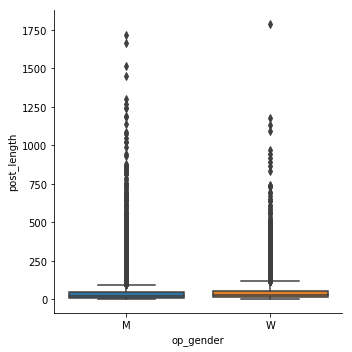

In [82]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=reddit_sample)

print('average post length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].post_length.mean())

So female posters typically have longer posts than male posters.

average response length when poster is male: 34.00321738910141
average response length when poster is female: 37.05367151135176


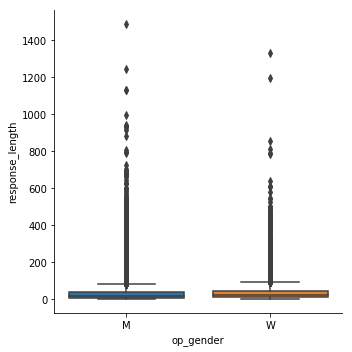

In [83]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=reddit_sample)

print('average response length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].response_length.mean())

Responses to female posters are a little bit longer than responses to male posters, but they are very close.

In [84]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39473.0  39.429331  61.591321  1.0  11.0  22.0  45.0  1715.0   
W             10527.0  47.459295  71.253088  1.0  12.0  26.0  55.0  1791.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39473.0  34.003217  51.326170  1.0   9.0  19.0  39.0  1488.0  
W                 10527.0  37.053672  54.809412  1.0  10.0  21.0  43.0  1328.0

In [85]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min    25%   50%  \
op_gender responder_gender                                                    
M                           35925.0  33.698093  51.179274  1.0   9.00  18.0   
          M                  2800.0  34.669286  46.398909  1.0   9.00  19.0   
          W                   748.0  46.164439  70.820708  1.0  12.00  25.5   
W                            9503.0  36.071556  53.023231  1.0  10.00  20.0   
          M                   772.0  46.164508  70.966188  1.0  12.00  26.0   
          W                   252.0  46.178571  60.843898  1.0  14.75  29.0   

                              75%     max  
op_gender responder_gender                 
M                           39.00  1488.0  
          M                 41.00   594.0  
          W                 50.25   931.0  
W                           42.00  1328.0  
          M                 52.00   813.0  
          W                 54.00   580.0

For now, we don't care about when responder gender isn't visible. Let's summarize:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly, male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

In [86]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [87]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [88]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8,12.666667,8.000000
104,104,2007scape,yakopcohen,M,False,Nonvilence,,unknown_gender,Thats it! Thanks so much!,You may want to give Runeloader/Orion a shot -...,"[Thats, it, !, Thanks, so, much, !]","[You, may, want, to, give, Runeloader/Orion, a...",7,18,3.500000,18.000000
148,148,2007scape,mysocksalwaysmatch,M,False,On_some_faux_shit,,unknown_gender,"Buy ppots as you go so you dont buy too many, ...",Ive heard that the bonus only applies to the i...,"[Buy, ppots, as, you, go, so, you, dont, buy, ...","[Ive, heard, that, the, bonus, only, applies, ...",69,37,17.250000,12.333333
167,167,2007scape,Midders_OP,M,False,Shortdood,,unknown_gender,So you have to be memebers? >ninjaedit: memebers,"Oh yeah, i think so.","[So, you, have, to, be, memebers, ?, >, ninjae...","[Oh, yeah, ,, i, think, so, .]",11,7,5.500000,7.000000
172,172,2007scape,IconsSaget,M,False,lDaZeDD,,unknown_gender,Why would the people have to be from the 2007 ...,"To be fair, a lot of rsps developers (aside fr...","[Why, would, the, people, have, to, be, from, ...","[To, be, fair, ,, a, lot, of, rsps, developers...",69,22,17.250000,22.000000


In [89]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                    \
                  count       mean       std  min  25%   50%   75%    max   
op_gender                                                                   
M               39473.0  13.502656  8.840390  1.0  8.0  12.0  17.5  482.0   
W               10527.0  13.828945  8.696018  1.0  8.0  12.5  18.0  218.0   

          response_avg_slen                                                     
                      count       mean       std  min  25%   50%    75%    max  
op_gender                                                                       
M                   39473.0  12.724906  8.543106  1.0  7.0  11.0  16.75  229.0  
W                   10527.0  12.912115  8.419860  1.0  7.0  11.5  17.00  148.0

In [90]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean       std  min    25%  \
op_gender responder_gender                                             
M                           35925.0  12.706740  8.561762  1.0  7.000   
          M                  2800.0  12.711096  7.948373  1.0  7.000   
          W                   748.0  13.649084  9.680511  1.0  7.575   
W                            9503.0  12.835764  8.516554  1.0  7.000   
          M                   772.0  13.540407  7.638525  1.0  8.000   
          W                   252.0  13.866580  6.756780  1.0  9.000   

                                  50%        75%    max  
op_gender responder_gender                               
M                           11.000000  16.666667  229.0  
          M                 11.333333  17.000000   96.0  
          W                 12.000000  17.357143  109.0  
W                           11.000000  17.000000  148.0  
          M                 12.500000  17.500000   60.0  
          W                 13.125000  18.000000   41.0

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

In [91]:
# computing average k-band
reddit_sample['post_avg_kband'] = reddit_sample.post_tokens.map(get_avg_google_kband)
reddit_sample['response_avg_kband'] = reddit_sample.response_tokens.map(get_avg_google_kband)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
34,34,2007scape,DCBizzle,M,False,puhpuhpawthead,,unknown_gender,How do you afford so many prayer potions? Edi...,hes got 85 rc aka mad bank yo,"[How, do, you, afford, so, many, prayer, potio...","[hes, got, 85, rc, aka, mad, bank, yo]",38,8,12.666667,8.000000,2.931034,6.428571
104,104,2007scape,yakopcohen,M,False,Nonvilence,,unknown_gender,Thats it! Thanks so much!,You may want to give Runeloader/Orion a shot -...,"[Thats, it, !, Thanks, so, much, !]","[You, may, want, to, give, Runeloader/Orion, a...",7,18,3.500000,18.000000,2.200000,1.357143
148,148,2007scape,mysocksalwaysmatch,M,False,On_some_faux_shit,,unknown_gender,"Buy ppots as you go so you dont buy too many, ...",Ive heard that the bonus only applies to the i...,"[Buy, ppots, as, you, go, so, you, dont, buy, ...","[Ive, heard, that, the, bonus, only, applies, ...",69,37,17.250000,12.333333,2.279070,2.966667
167,167,2007scape,Midders_OP,M,False,Shortdood,,unknown_gender,So you have to be memebers? >ninjaedit: memebers,"Oh yeah, i think so.","[So, you, have, to, be, memebers, ?, >, ninjae...","[Oh, yeah, ,, i, think, so, .]",11,7,5.500000,7.000000,1.000000,1.400000
172,172,2007scape,IconsSaget,M,False,lDaZeDD,,unknown_gender,Why would the people have to be from the 2007 ...,"To be fair, a lot of rsps developers (aside fr...","[Why, would, the, people, have, to, be, from, ...","[To, be, fair, ,, a, lot, of, rsps, developers...",69,22,17.250000,22.000000,1.677966,1.588235


In [92]:
reddit_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                38994.0  2.527163  1.471837  1.0  1.750000  2.225352   
W                10408.0  2.453884  1.393203  1.0  1.757576  2.183333   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.857143  20.0            38870.0  2.521081  1.628321  1.0   
W          2.730769  20.0            10373.0  2.441743  1.494695  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.666667  2.187500  2.833333  20.0  
W          1.666667  2.140625  2.750000  20.0

In [93]:
reddit_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M                           35360.0  2.525484  1.633867  1.0  1.666667   
          M                  2772.0  2.476069  1.624365  1.0  1.666667   
          W                   738.0  2.479170  1.352291  1.0  1.750000   
W                            9355.0  2.447491  1.521659  1.0  1.666667   
          M                   767.0  2.415967  1.261457  1.0  1.750000   
          W                   251.0  2.306257  1.075527  1.0  1.688988   

                                 50%       75%   max  
op_gender responder_gender                            
M                           2.192308  2.846154  20.0  
          M                 2.130435  2.762605  20.0  
          W                 2.190476  2.800000  16.0  
W                           2.137255  2.761905  20.0  
          M                 2.157895  2.685714  12.5  
          W                 2.157895  2.666667  11.0

Again, about the same.

### TED linguistic analysis

In [94]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [95]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [96]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72
8,8,Aimee Mullins,W,saeid,You are just such an extremely confident and c...,"[You, are, just, such, an, extremely, confiden...",22
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128
15,15,Aimee Mullins,W,KaRi,TED is the most exciting thing to come to Long...,"[TED, is, the, most, exciting, thing, to, come...",76


average response length when poster is male: 94.19585563259604
average response length when poster is female: 91.14947385864612


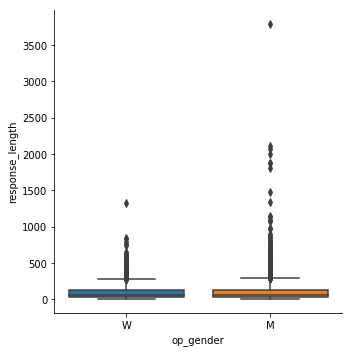

In [97]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when poster is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are longer when the speaker is male than when they are female. Let's look at some more detail:

In [98]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37931.0,94.195856,100.304735,1.0,25.0,61.0,132.0,3794.0
W,12069.0,91.149474,92.412908,1.0,25.0,60.0,128.0,1326.0


In [99]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [100]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [101]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282,23.500000
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72,18.000000
8,8,Aimee Mullins,W,saeid,You are just such an extremely confident and c...,"[You, are, just, such, an, extremely, confiden...",22,11.000000
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667
15,15,Aimee Mullins,W,KaRi,TED is the most exciting thing to come to Long...,"[TED, is, the, most, exciting, thing, to, come...",76,19.000000


In [102]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37931.0,18.547894,12.956506,1.0,11.4,17.0,22.904545,420.0
W,12069.0,18.223821,12.873847,1.0,11.0,16.5,22.500000,445.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker.

In [103]:
# add average google k-band
ted_sample['response_avg_kband'] = ted_sample.response_tokens.map(get_avg_google_kband)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen,response_avg_kband
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat...","[Aimee, 's, true, ``, disability, '', is, when...",282,23.500000,2.155844
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72,18.000000,1.777778
8,8,Aimee Mullins,W,saeid,You are just such an extremely confident and c...,"[You, are, just, such, an, extremely, confiden...",22,11.000000,2.421053
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667,2.160000
15,15,Aimee Mullins,W,KaRi,TED is the most exciting thing to come to Long...,"[TED, is, the, most, exciting, thing, to, come...",76,19.000000,1.830508


In [104]:
ted_sample.groupby('op_gender')['response_avg_kband'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37666.0,2.262036,0.973192,1.0,1.791667,2.108108,2.490823,20.0
W,11984.0,2.259655,0.963638,1.0,1.793103,2.114286,2.500000,19.0


And once again, the google k-band doesn't really differ between genders.